In [15]:
import AAnet
import network
import AAtools
import numpy as np
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load MNIST and normalize for tanh activation [-1,1]
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/mnist', one_hot=False)
data_all = mnist.train.images
data_all = (data_all * 2) - 1 # norm for tanh

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# pick single digit
digit = 4
idx_digit = mnist.train.labels == digit
data = data_all[idx_digit,]

In [4]:
# AAnet parameters
# this will create the following autoencoder: input -> 256 -> 64 -> 2 -> 64 -> 256 -> output
# note that 3 archetypes is encoded by 2 nodes
num_at = 3 # number of archetypes
noise_z_std = 0.0 # noise added to archetype layer during training
z_dim = [256,64] # encoder architecture, decoder has same but reverse architecture
act_out = tf.nn.tanh # activation of output layer
input_dim = data.shape[1] # dimensions of input data

In [5]:
# construct network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [6]:
# train AAnet
model.train(data, batch_size=128, num_batches=5000)

Iter [       0] Time [0.2569] loss [3.0616]
Iter [     500] Time [3.3691] loss [0.1611]
Iter [    1000] Time [6.4384] loss [0.1417]
Iter [    1500] Time [9.4540] loss [0.1456]
Iter [    2000] Time [12.3886] loss [0.1330]
Iter [    2500] Time [15.3589] loss [0.1406]
Iter [    3000] Time [18.3243] loss [0.1283]
Iter [    3500] Time [21.3892] loss [0.1296]
Iter [    4000] Time [24.5643] loss [0.1285]
Iter [    4500] Time [27.6151] loss [0.1314]
Iter [    4999] Time [30.5817] loss [0.1293]
done.


In [7]:
# get archetypes in input space
ats_x = model.get_ats_x()

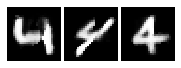

In [8]:
# plot archetypes
AAtools.plot_mnist(ats_x)

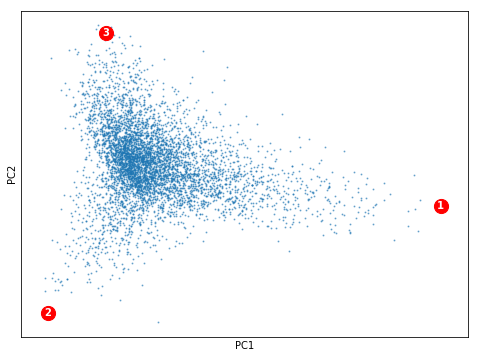

In [27]:
# PCA on archetypes with data projected using the PCA loadings
model.plot_pca_ats_data(data)

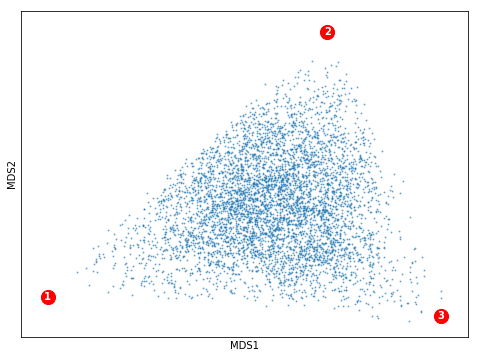

In [28]:
# MDS on archetypes with data projected as convex combination of MDS coordinatres of the archtypes
model.plot_at_mds(data)

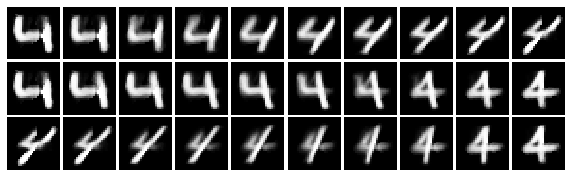

In [26]:
# generate images by linearly interpolating between each archetype pair
at_scan = model.at_scan(10)
at_scan_x = model.at2data(at_scan)
AAtools.plot_mnist(at_scan_x, nc=10)

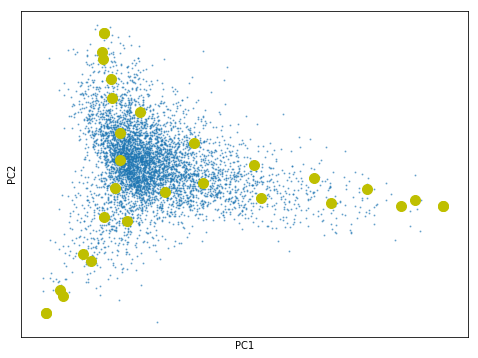

In [46]:
# PCA on archetypes with data and generated data projected using the PCA loadings
pca = PCA(n_components=2)
Y_pca_at = pca.fit_transform(ats_x)
Y_pca = pca.transform(data)
Y_pca_scan = pca.transform(at_scan_x)
# plot
fig, ax = plt.subplots(1, figsize=(8,6))
ax.scatter(Y_pca[:,0], Y_pca[:,1], s=1, alpha=0.5)
ax.scatter(Y_pca_scan[:,0], Y_pca_scan[:,1], s=100, c='y')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()